In [1]:
# Importing the pandas package
import pandas as pd

# Reading in condo_price_cm.csv, which is comma delimited.
df=pd.read_csv('test.csv', index_col = 0)
print(df.shape)

df.dropna()

print(df.shape)

df.drop_duplicates(inplace=True)


# Print the number of features, number of data points
print(df.shape)

# Print the name of the features of the data points
print(df.columns)

# Clean the columns names
df.columns = [name.strip() for name in list(df.columns)]
print(df.columns)

# Print the information of the dataset and check data types
df.info()

(4745, 13)
(4745, 13)
(4737, 13)
Index(['BHK', 'Rent', 'Size', 'Floor', 'Area_Type', 'Super_Area',
       'Carpet_Area', 'Area_Locality', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact'],
      dtype='object')
Index(['BHK', 'Rent', 'Size', 'Floor', 'Area_Type', 'Super_Area',
       'Carpet_Area', 'Area_Locality', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 4737 entries, 5/18/2022 to 5/4/2022
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4737 non-null   int64 
 1   Rent               4737 non-null   int64 
 2   Size               4737 non-null   int64 
 3   Floor              4737 non-null   object
 4   Area_Type          4737 non-null   object
 5   Super_Area         4737 non-null   int64 
 6   Carpet_Area        4737 non-null   int64

In [2]:
# select the dependent and target
sel_feature = ['BHK','Bathroom']
X=df[sel_feature].values
y=df['Rent'].values


In [3]:

import numpy as np
from scipy import stats

# Combine features and target into one DataFrame for easier processing
data = pd.DataFrame(X, columns=sel_feature)
data['Rent'] = y

# Calculate Z-scores
z_scores = np.abs(stats.zscore(data))

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Print out the number of outliers found
print(f"Number of outliers found: {len(outliers[0])}")

# Remove outliers
data_no_outliers = data[(z_scores < threshold).all(axis=1)]

# Split the data back into features and target
X_train = data_no_outliers[sel_feature].values
y_train = data_no_outliers['Rent'].values

""" Split the data into training and testing sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3, random_state=42)
"""
# Print the size of the training and testing data after removing outliers
# Import the libary to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.3, 
                                                    random_state=42)


# Print the size of the training and testing data
print(X_train.shape, X_test.shape)

Number of outliers found: 169
(3315, 2) (1422, 2)


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


steps = [('scaler', StandardScaler()), 
         ('poly', PolynomialFeatures(degree = range(1,5), 
                                     include_bias=False)),
         ('liReg', LinearRegression())]

parameters = {"poly__degree":range(1,5)}
pipeline = Pipeline(steps)


poly_grid = GridSearchCV(pipeline, parameters, 
                         cv=5, 
                         scoring='neg_mean_absolute_error',
                         verbose= True) 

poly_grid.fit(X_train, y_train)



Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(degree=range(1, 5),
                                                           include_bias=False)),
                                       ('liReg', LinearRegression())]),
             param_grid={'poly__degree': range(1, 5)},
             scoring='neg_mean_absolute_error', verbose=True)

In [5]:
best_parameters = poly_grid.best_params_

best_score = poly_grid.best_score_
best_index = poly_grid.best_index_
# print the values of the parameters 
print ('best order is :', best_parameters)

print("best index is ", best_index)
    




best order is : {'poly__degree': 4}
best index is  3


In [6]:
# predict the sales for the testing data
ytest_pred = poly_grid.predict(X_test)

#predict the sales for the training data
ytrain_pred = poly_grid.predict(X_train)

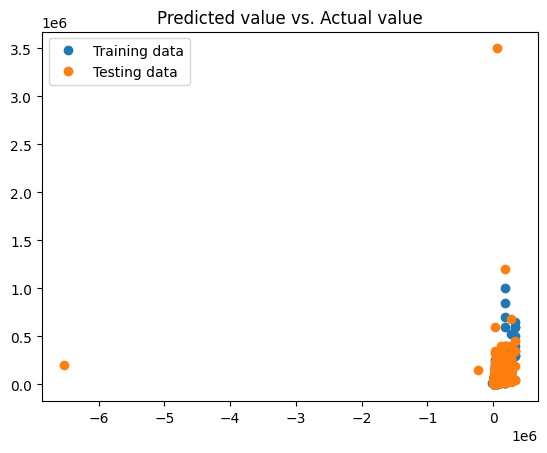

In [7]:
# import matplotlib for visualization

import matplotlib.pyplot as plt

plt.plot(ytrain_pred,  y_train, 'o')
plt.plot(ytest_pred,  y_test, 'o')

plt.title("Predicted value vs. Actual value")
plt.legend(["Training data", "Testing data"])
plt.show()

(4618, 2) (4618,)
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
(4597, 2) (4597,)
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
(4657, 2) (4657,)
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
(4657, 2) (4657,)
Fitting 5 folds for each of 1 candidates, t

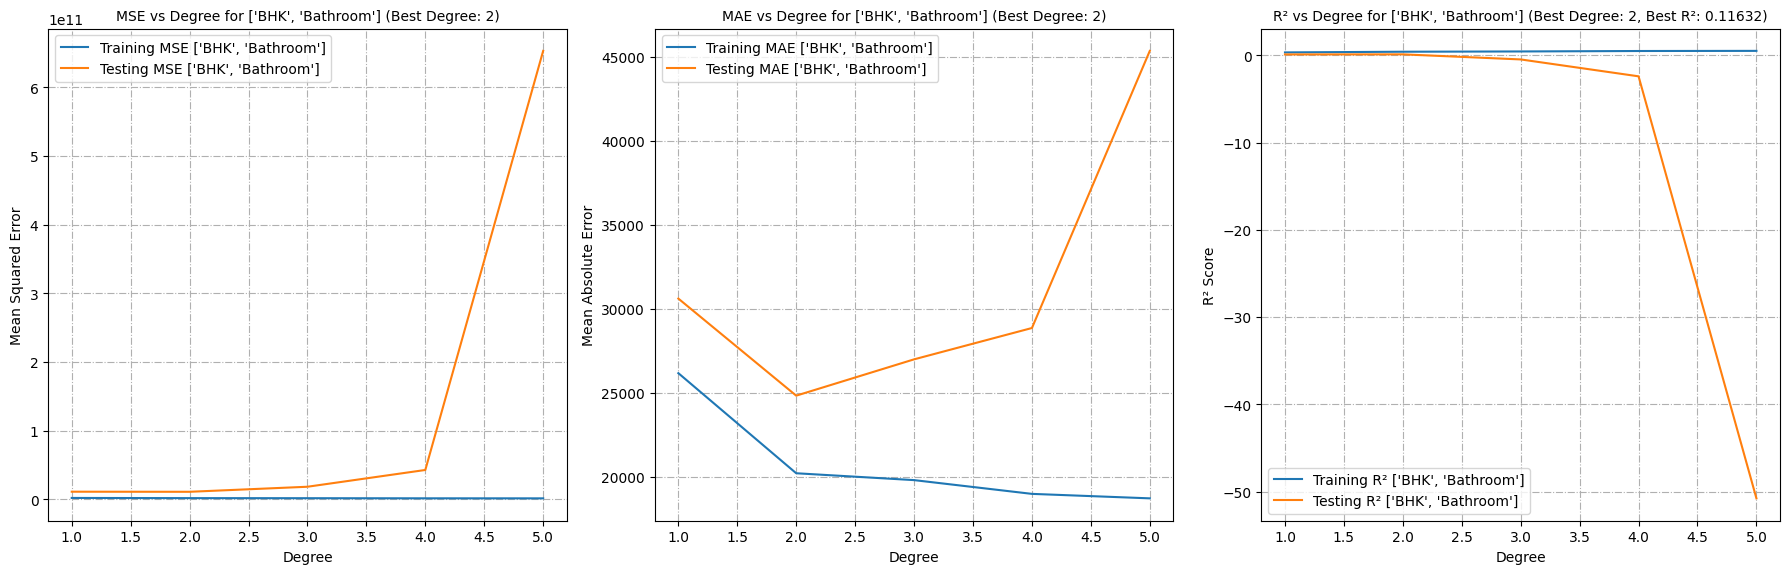

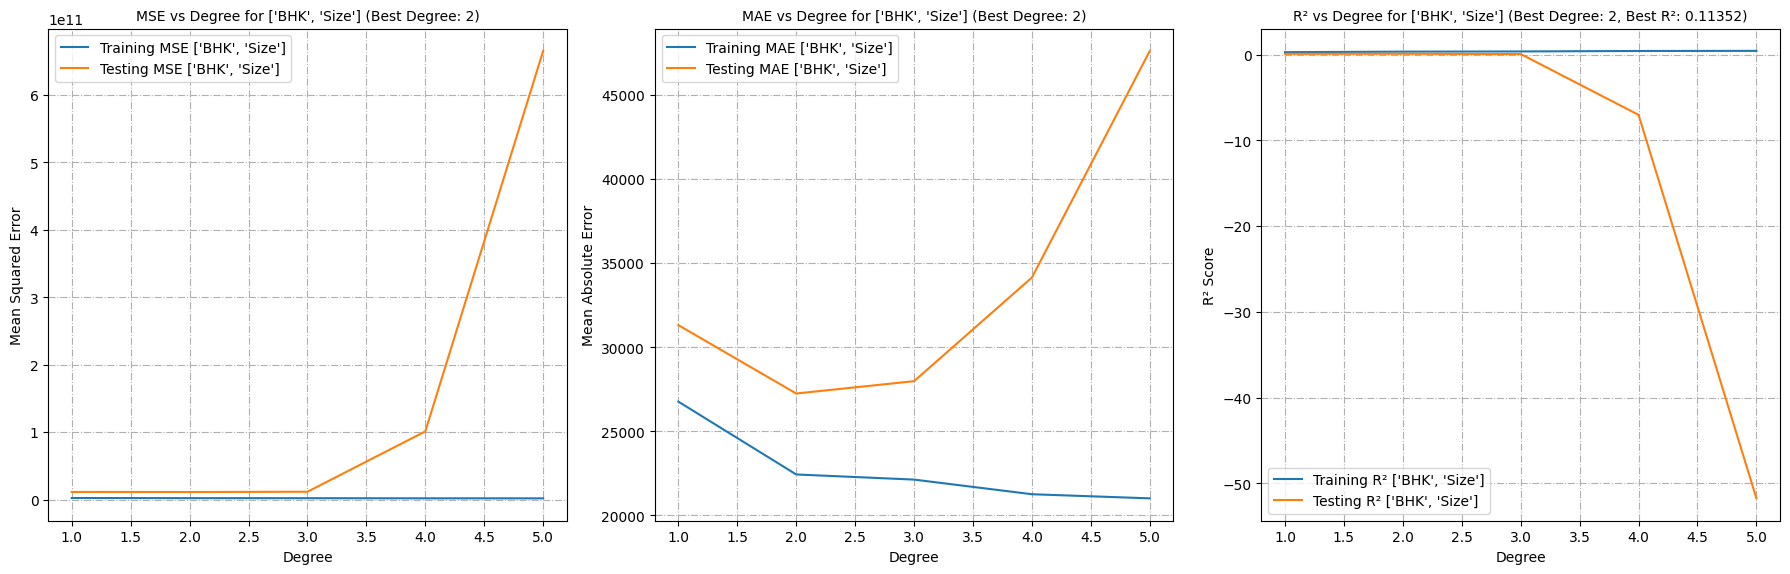

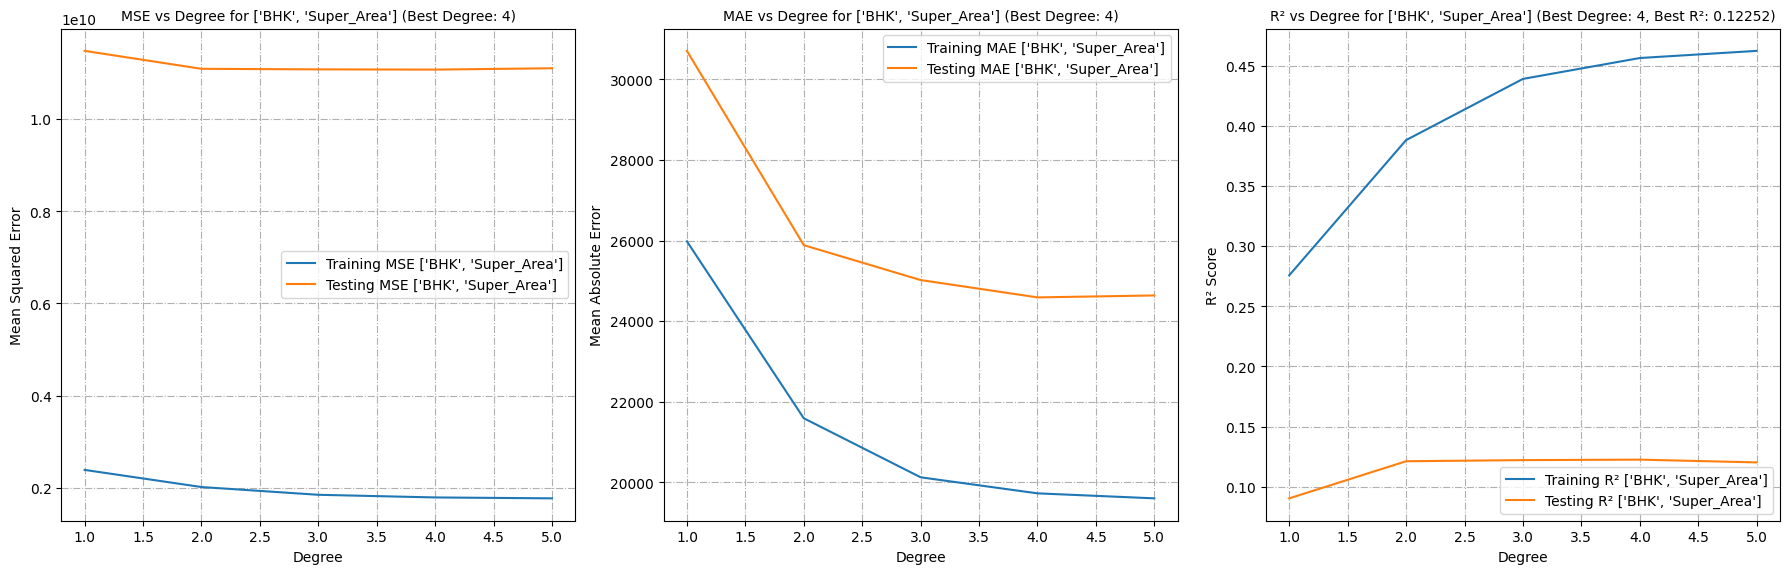

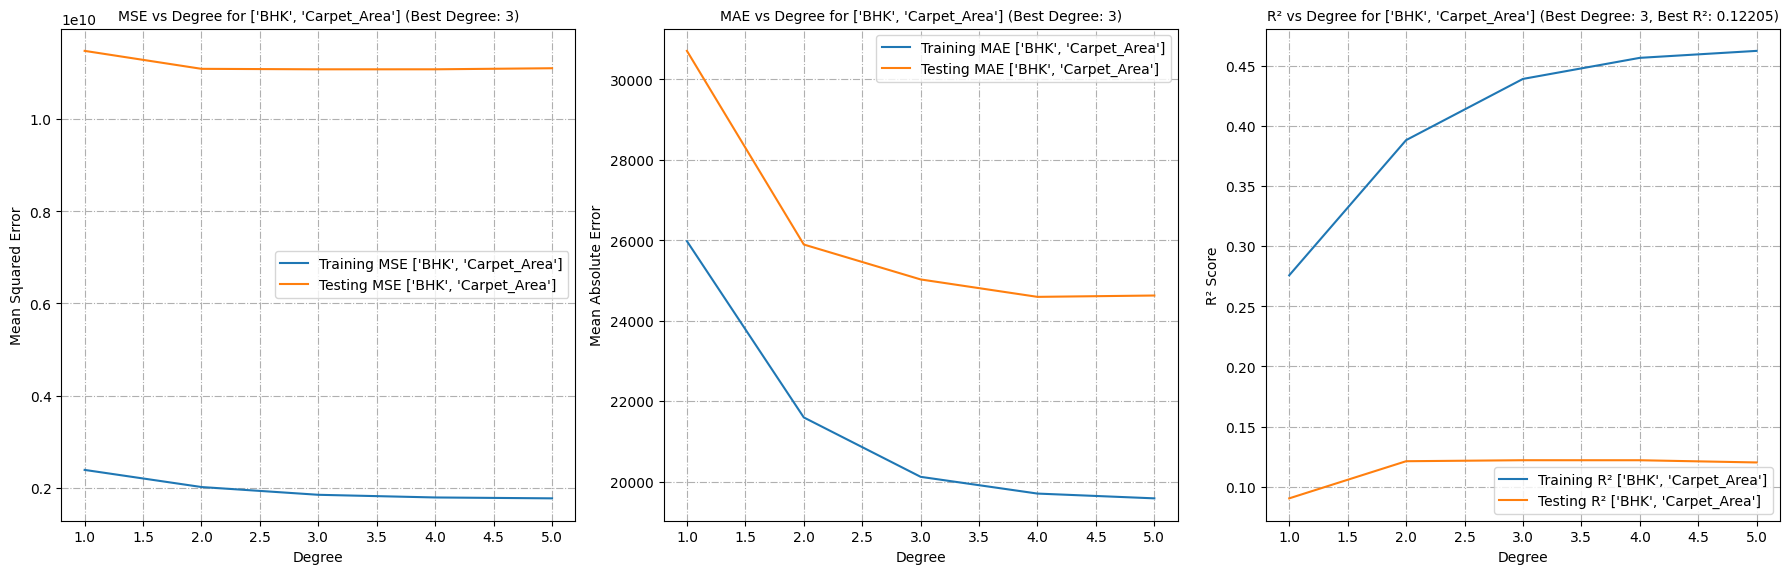

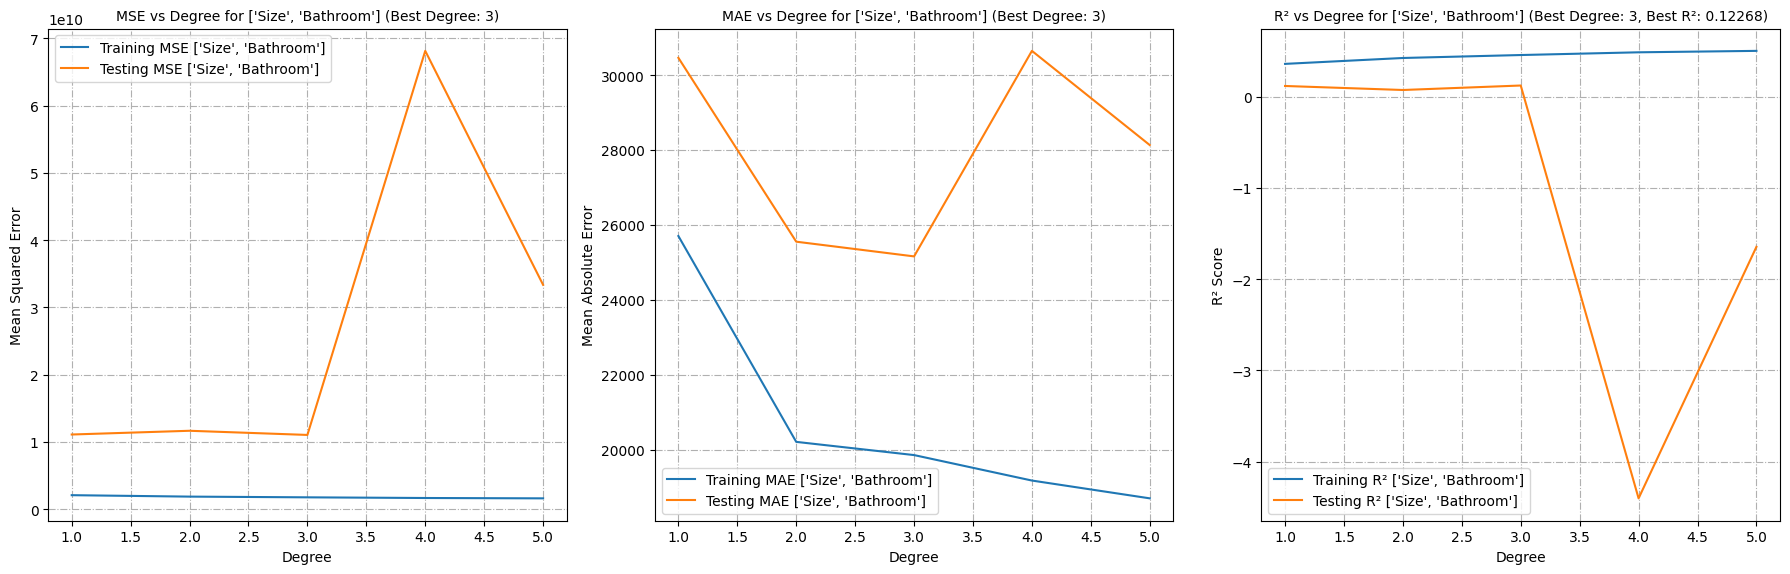

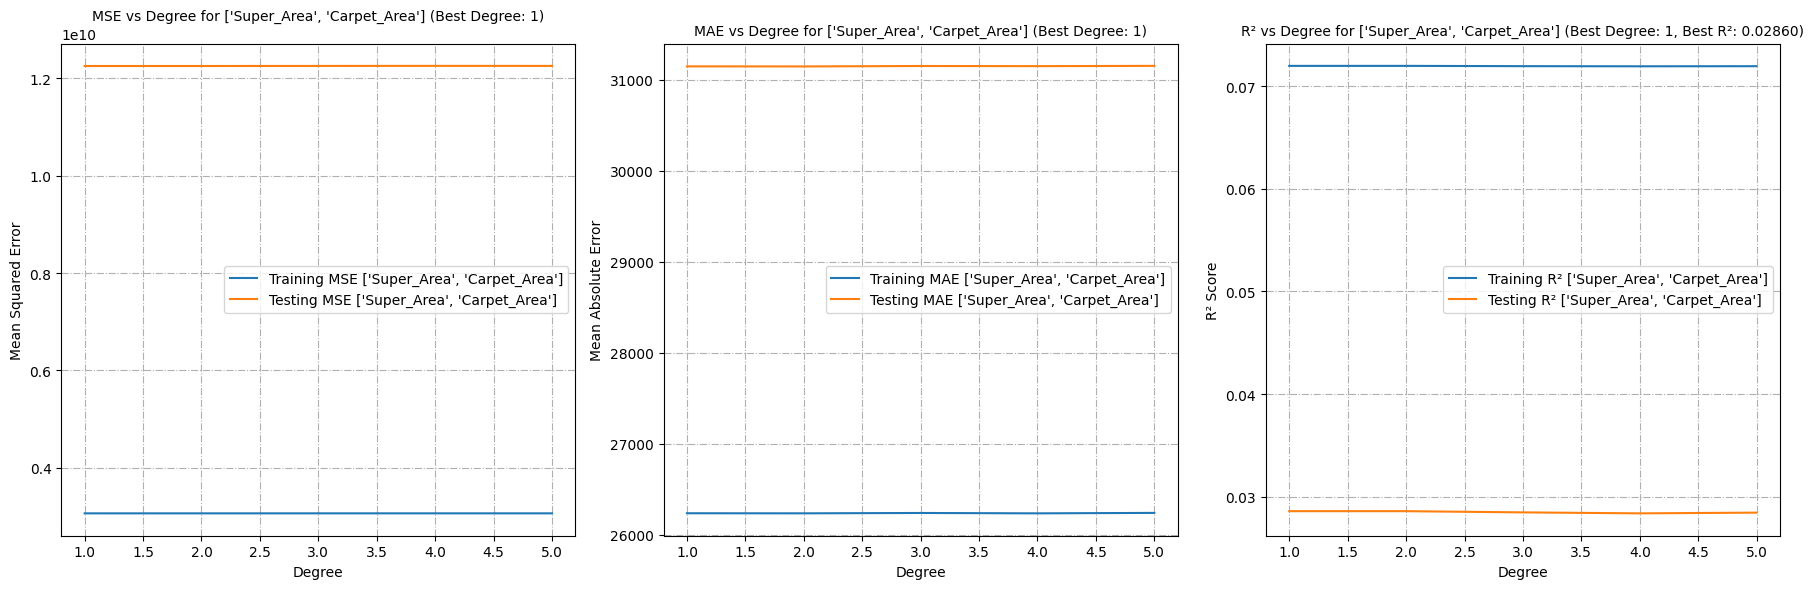

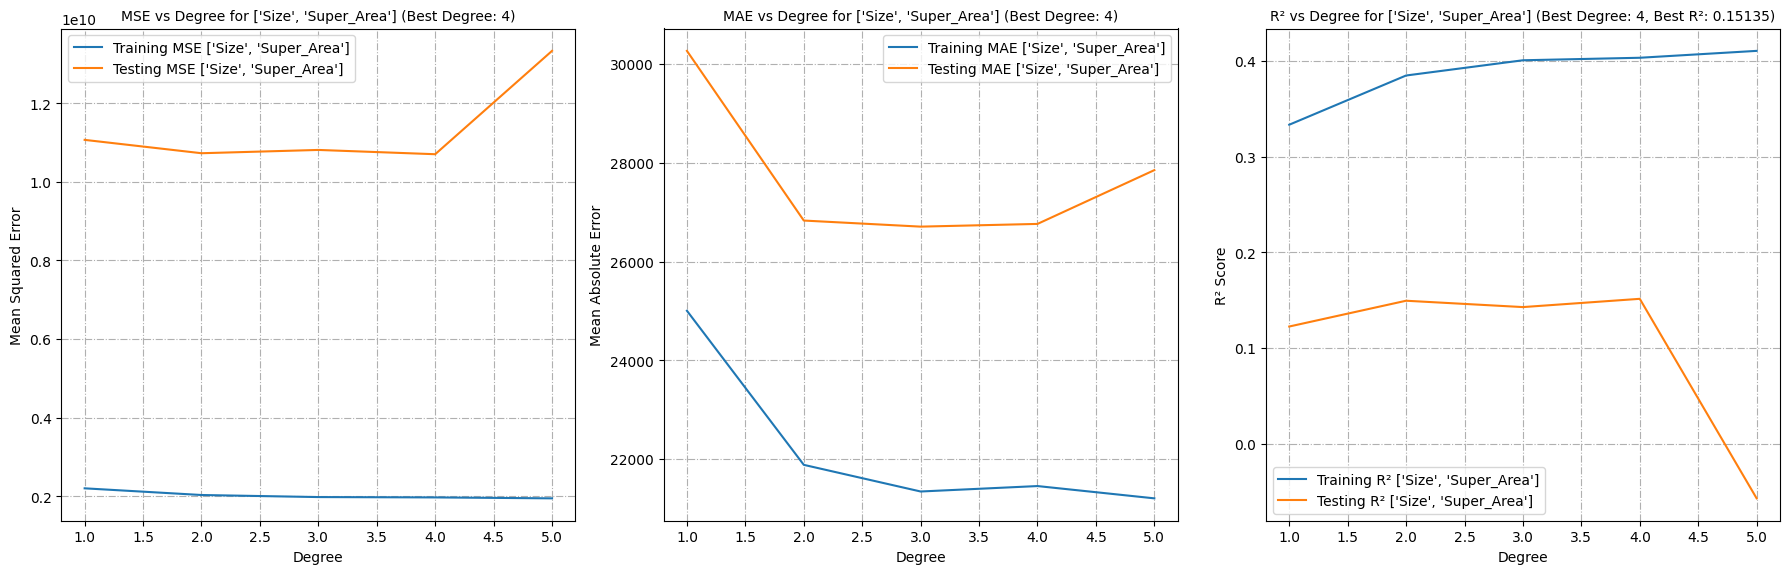

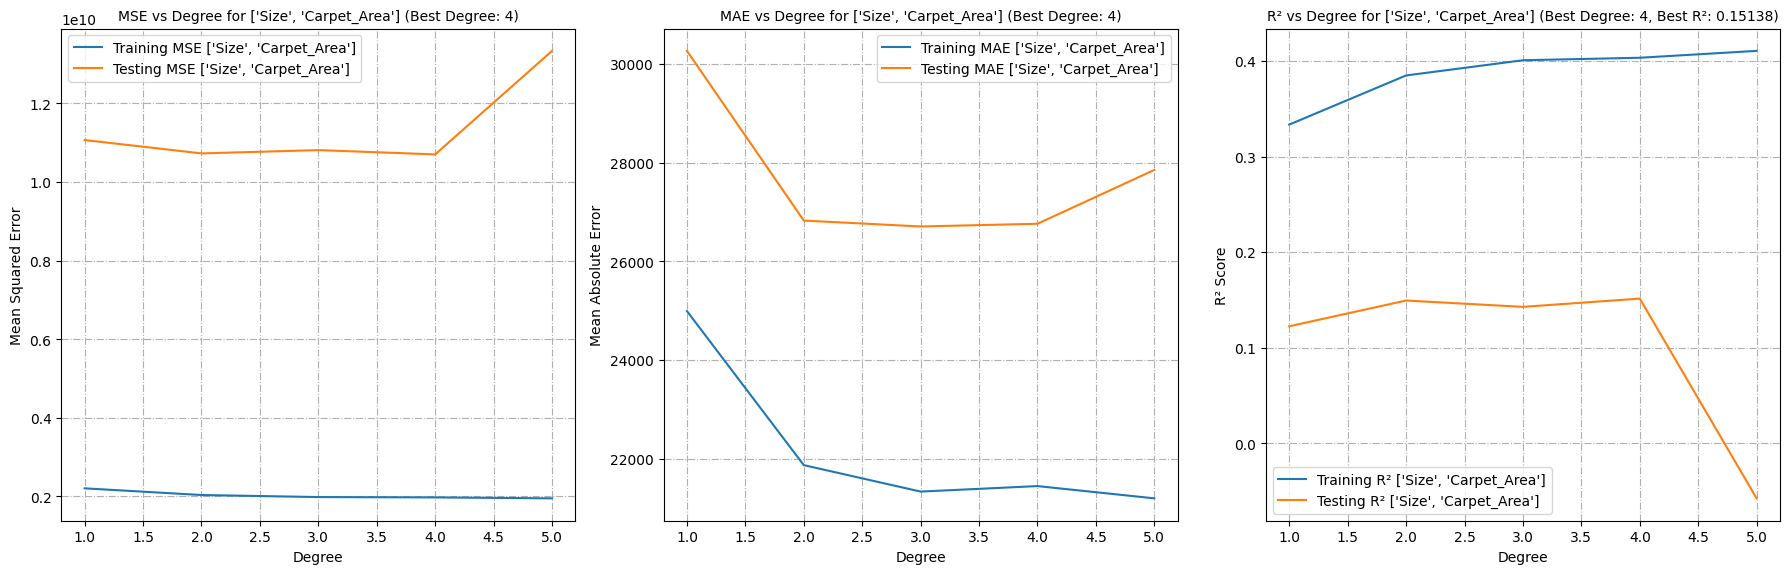

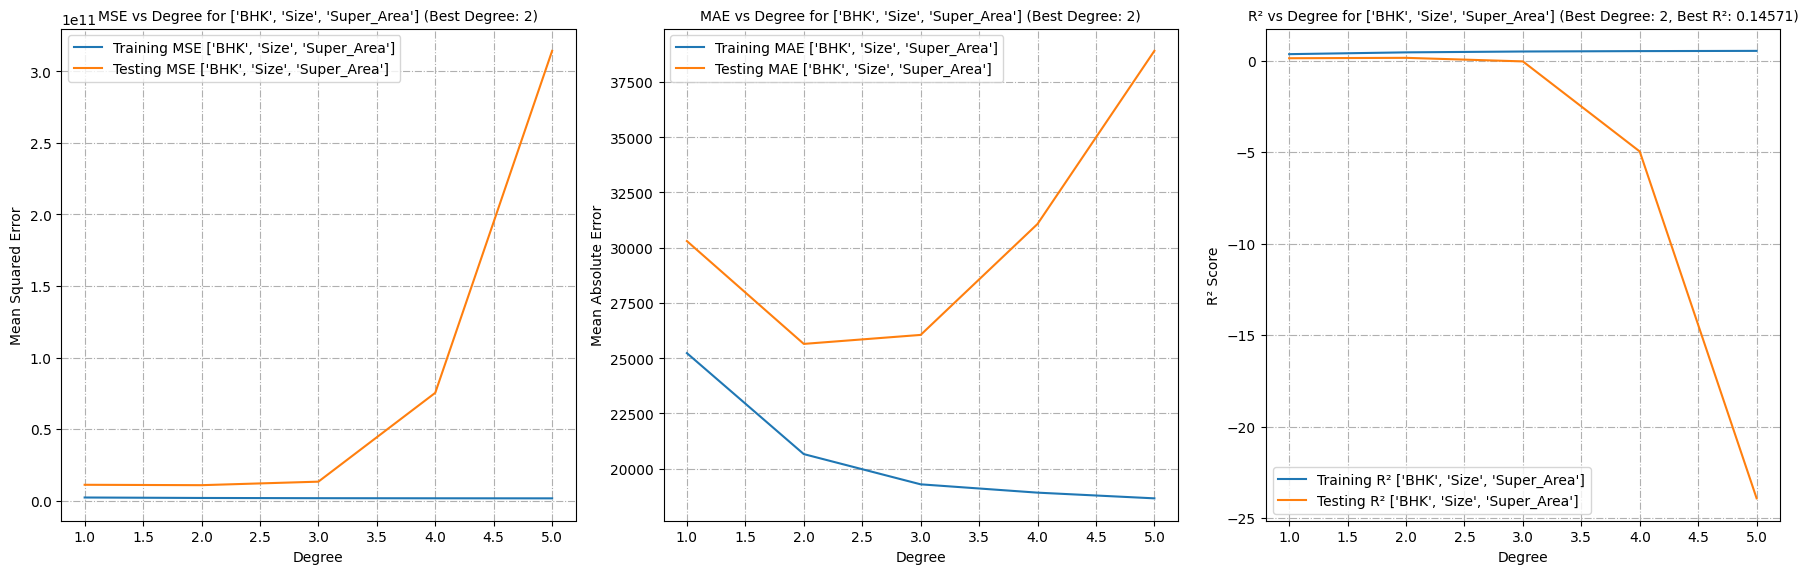

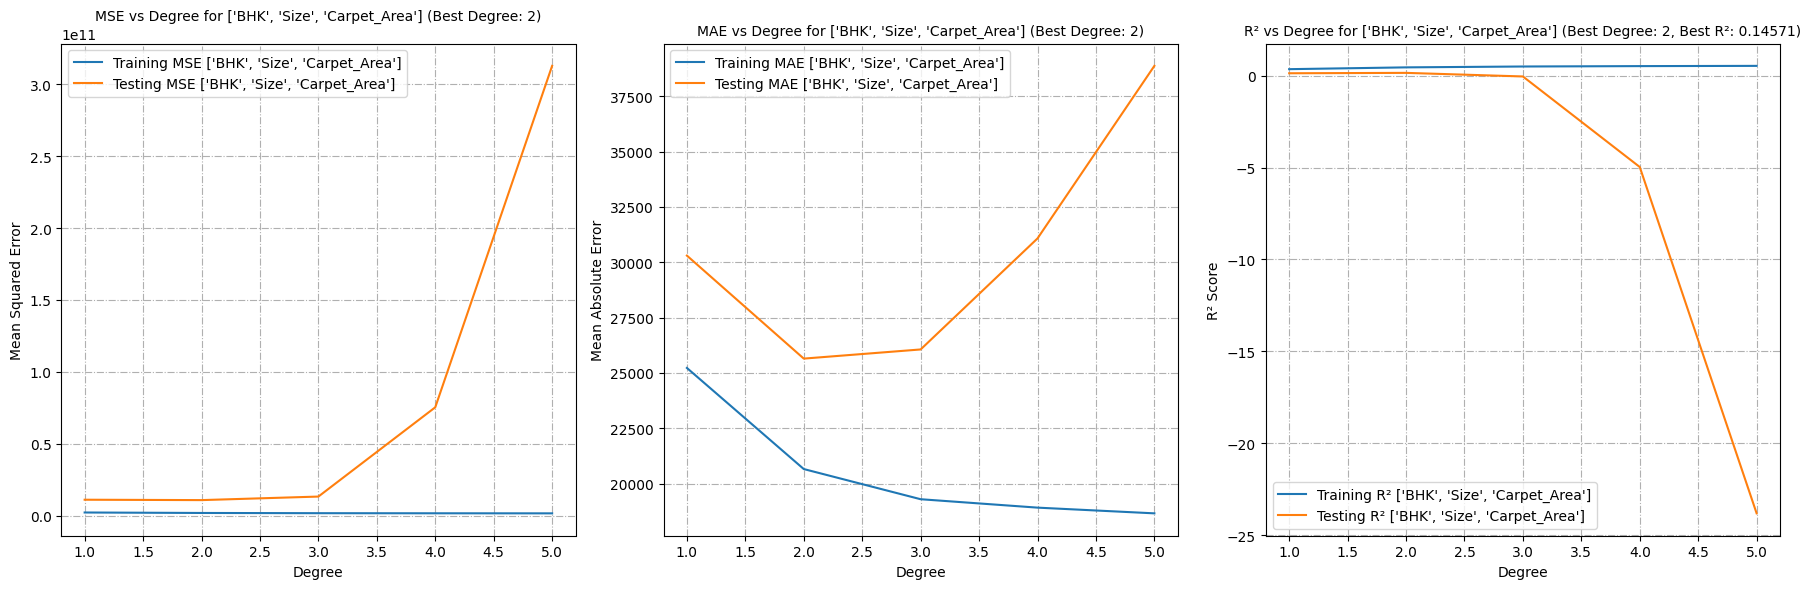

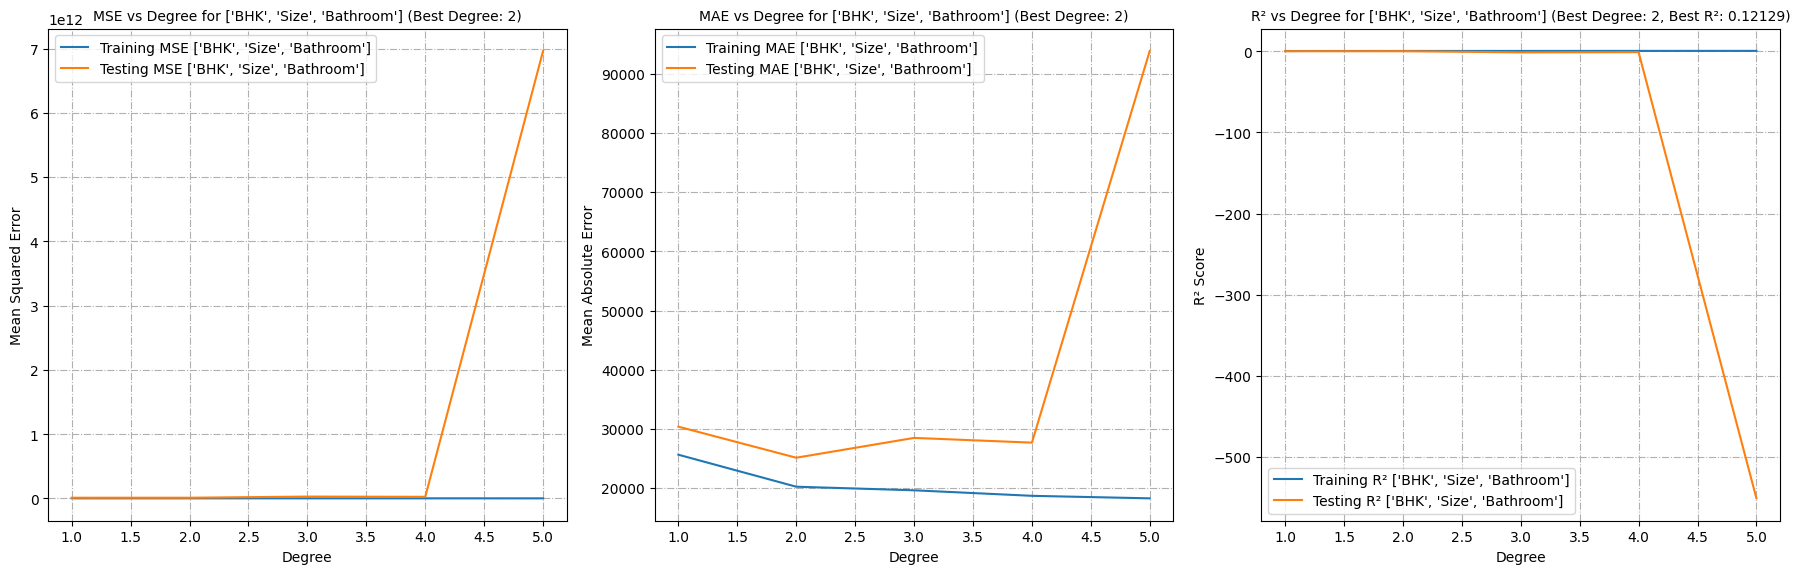

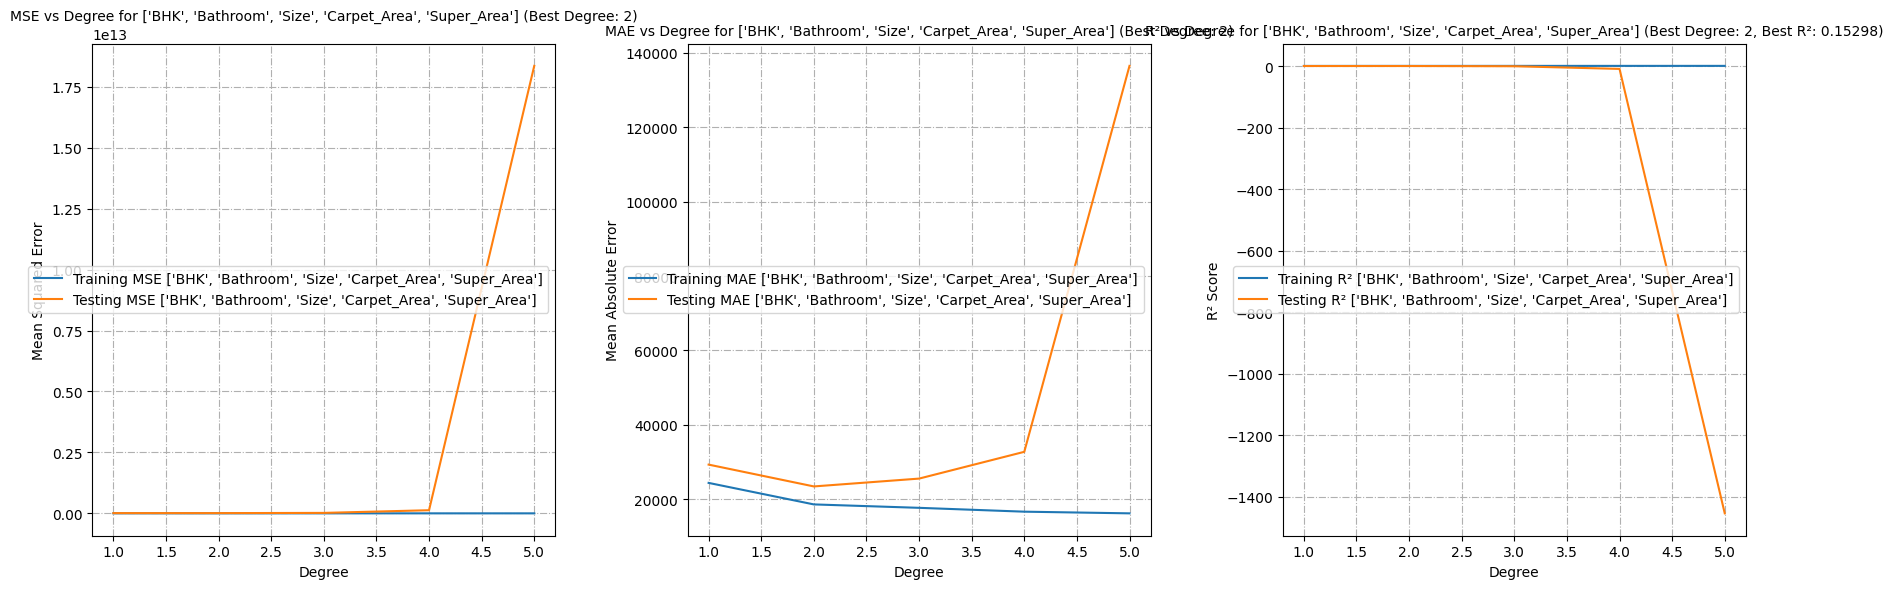

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats

# Define the feature combinations
feature_combinations = [["BHK", "Bathroom"],["BHK","Size"],["BHK","Super_Area"],["BHK", "Carpet_Area"], ["Size", "Bathroom"], 
                        ["Super_Area", "Carpet_Area"],["Size", "Super_Area"], ["Size", "Carpet_Area"],
                        ["BHK","Size","Super_Area"],["BHK","Size","Carpet_Area"],["BHK","Size","Bathroom"],["BHK", "Bathroom","Size","Carpet_Area","Super_Area"]]
degrees = range(1,6) # try degrees from 1 to 10\


results = {str(combo): {'mse_train': [], 'mse_test': [],'mae_train':[],'mae_test':[], 'r2_train': [], 'r2_test': []} for combo in feature_combinations}

# Loop through each feature combination
for sel_feature in feature_combinations:
    X = df[sel_feature].values
    y = df['Rent'].values

    data = pd.DataFrame(X, columns=sel_feature)
    data['Rent'] = y

# Calculate Z-scores
    z_scores = np.abs(stats.zscore(data))

# Define a threshold for identifying outliers
    threshold = 3

# Identify outliers
    outliers = np.where(z_scores > threshold)

# Remove outliers
    data_no_outliers = data[(z_scores < threshold).all(axis=1)]
    X_train = data_no_outliers[sel_feature].values
    y_train = data_no_outliers['Rent'].values


# Print the size of the training and testing data after removing outliers

    print(X_train.shape, y_train.shape)
# Import the libary to split the data
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.3, 
                                                    random_state=42)


    
    for degree in degrees:   


        steps = [('scaler', StandardScaler()),
                 ('poly', PolynomialFeatures(degree=5, include_bias=False)),
                 ('liReg', LinearRegression())]
        
        parameters = {"poly__degree": [degree]}
        pipeline = Pipeline(steps)

        poly_grid = GridSearchCV(pipeline, parameters,cv=5,scoring='neg_mean_absolute_error',verbose=True)
    

        poly_grid.fit(X_train, y_train)

        # Evaluate on training and testing data
        y_train_pred = poly_grid.predict(X_train)
        y_test_pred = poly_grid.predict(X_test)

        results[str(sel_feature)]['mse_train'].append(mean_squared_error(y_train, y_train_pred))
        results[str(sel_feature)]['mse_test'].append(mean_squared_error(y_test, y_test_pred))

        results[str(sel_feature)]['mae_train'].append(mean_absolute_error(y_train, y_train_pred))
        results[str(sel_feature)]['mae_test'].append(mean_absolute_error(y_test, y_test_pred))

        results[str(sel_feature)]['r2_train'].append(r2_score(y_train, y_train_pred))
        results[str(sel_feature)]['r2_test'].append(r2_score(y_test, y_test_pred))



# Identify the best degree and R² score for each feature combination
best_degrees = {}

for sel_feature in feature_combinations:
    combo_str = str(sel_feature)
    best_degree = degrees[np.argmax(results[combo_str]['r2_test'])]
    best_mae = degrees[np.argmax(results[combo_str]['mae_test'])]
    

    #best_r2 = max(results[combo_str]['r2_test'])
    best_r2_test =max(results[combo_str]['r2_test'])
    best_r2_train = max(results[combo_str]['r2_train'])
    

    best_degrees[combo_str] = (best_degree, best_r2_test,best_r2_train)

    print(f'Best degree for {combo_str}: {best_degree} with R² score for testing: {best_r2_test:.5f}')
    print(f'Best degree for {combo_str}: {best_degree} with R² score for training: {best_r2_train:.5f}')
    print(" ")

# Plot for each feature combination with best degree and R² score
for sel_feature in feature_combinations:
    combo_str = str(sel_feature)
    best_degree, best_r2_test,best_r2_train= best_degrees[combo_str]
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 3, 1)
    plt.plot(degrees, results[combo_str]['mse_train'], label=f'Training MSE {combo_str}')
    plt.plot(degrees, results[combo_str]['mse_test'], label=f'Testing MSE {combo_str}')
    plt.xlabel('Degree')
    plt.ylabel('Mean Squared Error')
    plt.title(f'MSE vs Degree for {combo_str} (Best Degree: {best_degree})',size=10)
    plt.grid(True, linestyle='-.')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(degrees, results[combo_str]['mae_train'], label=f'Training MAE {combo_str}')
    plt.plot(degrees, results[combo_str]['mae_test'], label=f'Testing MAE {combo_str}')
    plt.xlabel('Degree')
    plt.ylabel('Mean Absolute Error')
    plt.title(f'MAE vs Degree for {combo_str} (Best Degree: {best_degree})',size=10)
    plt.grid(True, linestyle='-.')
    plt.legend()
    
    
   
    plt.subplot(1, 3, 3)
    plt.plot(degrees, results[combo_str]['r2_train'], label=f'Training R² {combo_str}')
    plt.plot(degrees, results[combo_str]['r2_test'], label=f'Testing R² {combo_str}')
    plt.xlabel('Degree')
    plt.ylabel('R² Score')
    plt.title(f'R² vs Degree for {combo_str} (Best Degree: {best_degree}, Best R²: {best_r2_test:.5f})',size=10)
    plt.grid(True, linestyle='-.')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [9]:
# import the required modules
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# evauate on the training set
print("This is training set")

mae = mean_absolute_error(y_train, ytrain_pred)
print('Mean absolute error: ', mae)
mse = mean_squared_error(y_train, ytrain_pred)
print('Mean squared error: ', mse)
r2 = r2_score(y_train, ytrain_pred)
print('R2 score is: ', r2)
print(" ")

# evauate on the testing set

print("This is training set")

mae = mean_absolute_error(y_test, ytest_pred)
print('Mean absolute error: ', mae)
mse = mean_squared_error(y_test, ytest_pred)
print('Mean squared error: ', mse)
r2 = r2_score(y_test, ytest_pred)
print('R2 score is: ', r2)

This is training set
Mean absolute error:  18990.590467797385
Mean squared error:  1653570183.128445
R2 score is:  0.49959534936007344
 
This is training set
Mean absolute error:  28857.326842634844
Mean squared error:  42915403355.357765
R2 score is:  -2.402411617828797
